<a href="https://colab.research.google.com/github/DukeZhu513/DeepLearning/blob/main/overleaffitting_and_unfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

<function matplotlib.pyplot.show(close=None, block=None)>

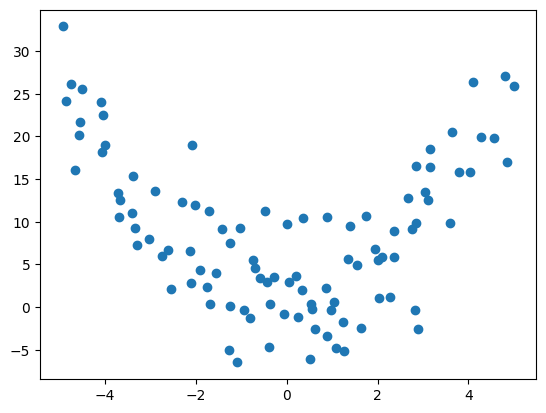

In [2]:
np.random.seed(32)

num_samples = 100
X = np.random.uniform(-5, 5, (num_samples, 1))#均匀分布
Y = X ** 2 + 1 + 5 * np.random.normal(0, 1, (num_samples, 1))

X = torch.from_numpy(X).float()
Y = torch.from_numpy(Y).float()

plt.scatter(X,Y)
plt.show

#数据划分

In [3]:
#将数据拆分为训练集和测试集
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 0)
train_dataloader = DataLoader(TensorDataset(train_X, train_Y),batch_size=32, shuffle=True)
test_dataloader = DataLoader(TensorDataset(test_X, test_Y), batch_size=32, shuffle = False)

#模型定义

In [4]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    return self.linear(x)

#多层感知机
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(1, 8)
    self.output = nn.Linear(8, 1)

  def forward(self, x):
    x = torch.relu(self.hidden(x))
    return self.output(x)

#更为复杂的多层感知机（过拟合）
class MLPOverfitting(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(1, 256)
    self.hidden2 = nn.Linear(256, 256)
    self.output = nn.Linear(256, 1)

  def forward(self, x):
    x = torch.relu(self.hidden1(x))
    x = torch.relu(self.hidden2(x))
    return self.output(x)

# 辅助函数（记录训练数据）

In [5]:
def plot_errors(models, num_epochs, train_dataloader, test_dataloader):
  #定义损失函数
  loss_fn = nn.MSELoss()
  train_losses = []
  test_losses = []

  #遍历模型
  for model in models:
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.005)
    #定义误差数组
    train_losses_per_model = []
    test_losses_per_model = []

    for epoch in range(num_epochs):
      model.train()
      train_loss = 0
      for inputs, targets in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

      train_loss /= len(train_dataloader)
      train_losses_per_model.append(train_loss)

      # 在测试数据上评估，测试模型不计算梯度
      model.eval()
      test_loss = 0
      with torch.no_grad():
        # 遍历测试集
        for inputs, targets in test_dataloader:
          # 预测、损失函数
          outputs = model(inputs)
          loss = loss_fn(outputs, targets)
          # 记录loss
          test_loss += loss.item()

        # 计算loss并记录
        test_loss /= len(test_dataloader)
        test_losses_per_model.append(test_loss)

    train_losses.append(train_losses_per_model)
    test_losses.append(test_losses_per_model)

  return train_losses, test_losses

In [6]:
num_epochs = 200
models = [LinearRegression(), MLP(), MLPOverfitting()]
train_losses, test_losses = plot_errors(models, num_epochs, train_dataloader, test_dataloader)

#可视化

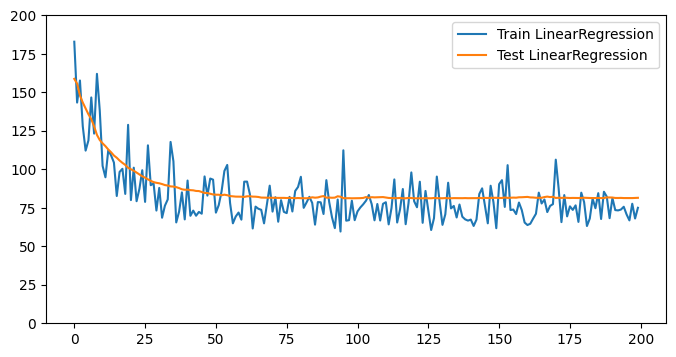

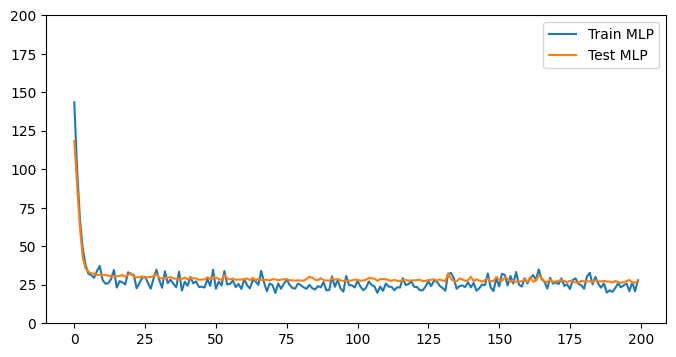

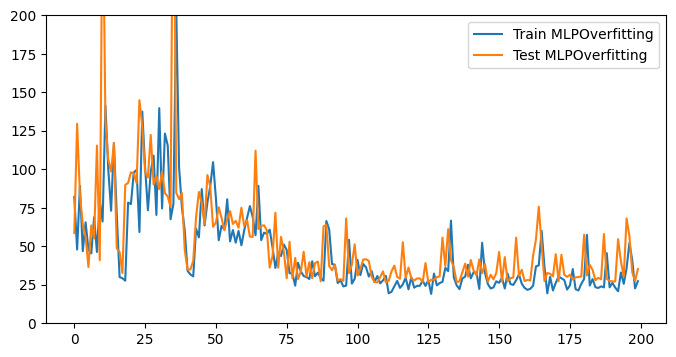

In [7]:
for i ,model in enumerate(models):
  plt.figure(figsize = (8, 4))
  plt.plot(range(num_epochs), train_losses[i], label = f"Train {model.__class__.__name__}")
  plt.plot(range(num_epochs), test_losses[i], label = f"Test {model.__class__.__name__}")
  plt.legend()
  plt.ylim((0, 200))
  plt.show()